In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Data Cleaning

In [2]:
df=pd.read_csv("pew_research.csv",parse_dates=["Time"])
df=df.drop(df.columns[0],axis=1)

In [3]:
df.head()

,Header,Description,Time,Label
0,Most U.S. voters say immigrants – no matter th...,Three-quarters of voters say undocumented immi...,2024-10-21 00:00:00+00:00,short reads
1,What the data says about immigrants in the U.S.,"In 2022, roughly 10.6 million immigrants livin...",2024-09-27 00:00:00+00:00,short reads
2,Trump and Harris Supporters Differ on Mass Dep...,A majority of Trump backers say more immigrant...,2024-09-27 00:00:00+00:00,report
3,Why Asian Immigrants Come to the U.S. and How ...,Most say they’d move to the U.S. again if they...,2024-10-09 00:00:00+00:00,report
4,What we know about unauthorized immigrants liv...,The unauthorized immigrant population in the U...,2024-07-22 00:00:00+00:00,short reads


In [4]:
df.tail()

,Header,Description,Time,Label
2071,Americans Unmoved by Washington’s Big Stories,Introduction and Summary Top news stories from...,1997-04-11 00:00:00+00:00,report
2072,Republicans,Analysis Breakdowns An analysis of recent Pew ...,1996-08-07 00:00:00+00:00,report
2073,"The Diminishing Divide…American Churches, Amer...",Introduction and Summary Religion is a strong ...,1996-06-25 00:00:00+00:00,report
2074,Democratic Congressional Prospects Improve,Introduction and Summary Criticism of the GOP ...,1996-04-05 00:00:00+00:00,report
2075,Polls Trounce Pundits In Forecasting Primaries,Also: Wither The Perot Voter; Polling On The B...,1996-03-14 00:00:00+00:00,report


#### Combine Header and Descriptions columns into one 

In [5]:
df["texts"]=df["Header"]+". "+df["Description"]
df.head()

,Header,Description,Time,Label,texts
0,Most U.S. voters say immigrants – no matter th...,Three-quarters of voters say undocumented immi...,2024-10-21 00:00:00+00:00,short reads,Most U.S. voters say immigrants – no matter th...
1,What the data says about immigrants in the U.S.,"In 2022, roughly 10.6 million immigrants livin...",2024-09-27 00:00:00+00:00,short reads,What the data says about immigrants in the U.S...
2,Trump and Harris Supporters Differ on Mass Dep...,A majority of Trump backers say more immigrant...,2024-09-27 00:00:00+00:00,report,Trump and Harris Supporters Differ on Mass Dep...
3,Why Asian Immigrants Come to the U.S. and How ...,Most say they’d move to the U.S. again if they...,2024-10-09 00:00:00+00:00,report,Why Asian Immigrants Come to the U.S. and How ...
4,What we know about unauthorized immigrants liv...,The unauthorized immigrant population in the U...,2024-07-22 00:00:00+00:00,short reads,What we know about unauthorized immigrants liv...


In [6]:
df=df[["Time","Label","texts"]]
df.head()

,Time,Label,texts
0,2024-10-21 00:00:00+00:00,short reads,Most U.S. voters say immigrants – no matter th...
1,2024-09-27 00:00:00+00:00,short reads,What the data says about immigrants in the U.S...
2,2024-09-27 00:00:00+00:00,report,Trump and Harris Supporters Differ on Mass Dep...
3,2024-10-09 00:00:00+00:00,report,Why Asian Immigrants Come to the U.S. and How ...
4,2024-07-22 00:00:00+00:00,short reads,What we know about unauthorized immigrants liv...


#### EDA

In [7]:
df.Label.value_counts()

Label
report           1185
short reads       715
transcript         80
fact sheet         42
feature            22
data essay         16
presentation        6
press release       6
database            3
video               1
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

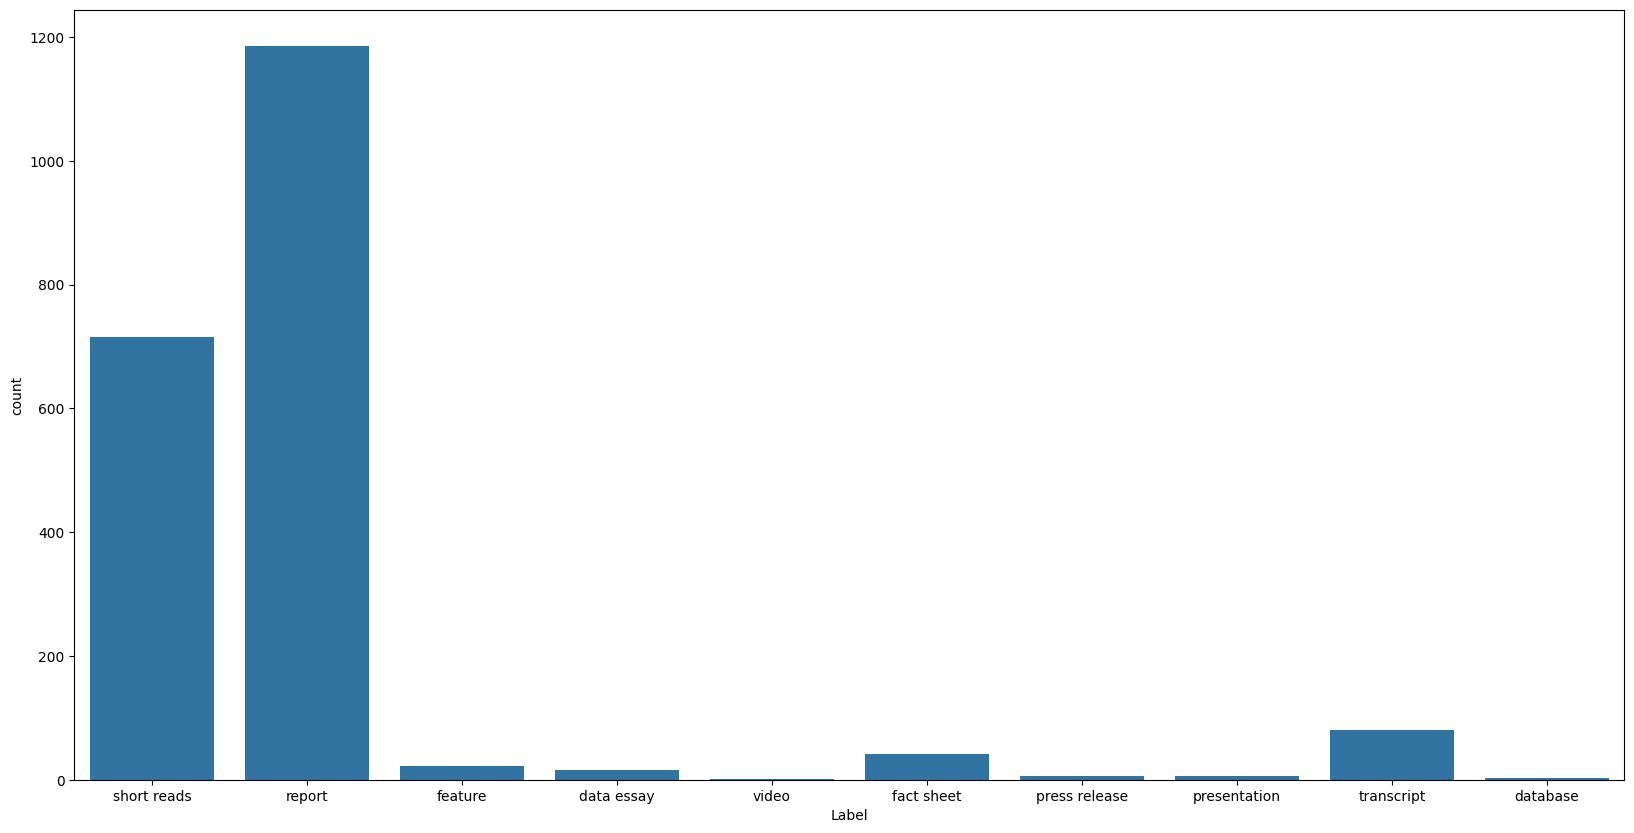

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="Label")

#### Popularity of immigration as a topic through the years.

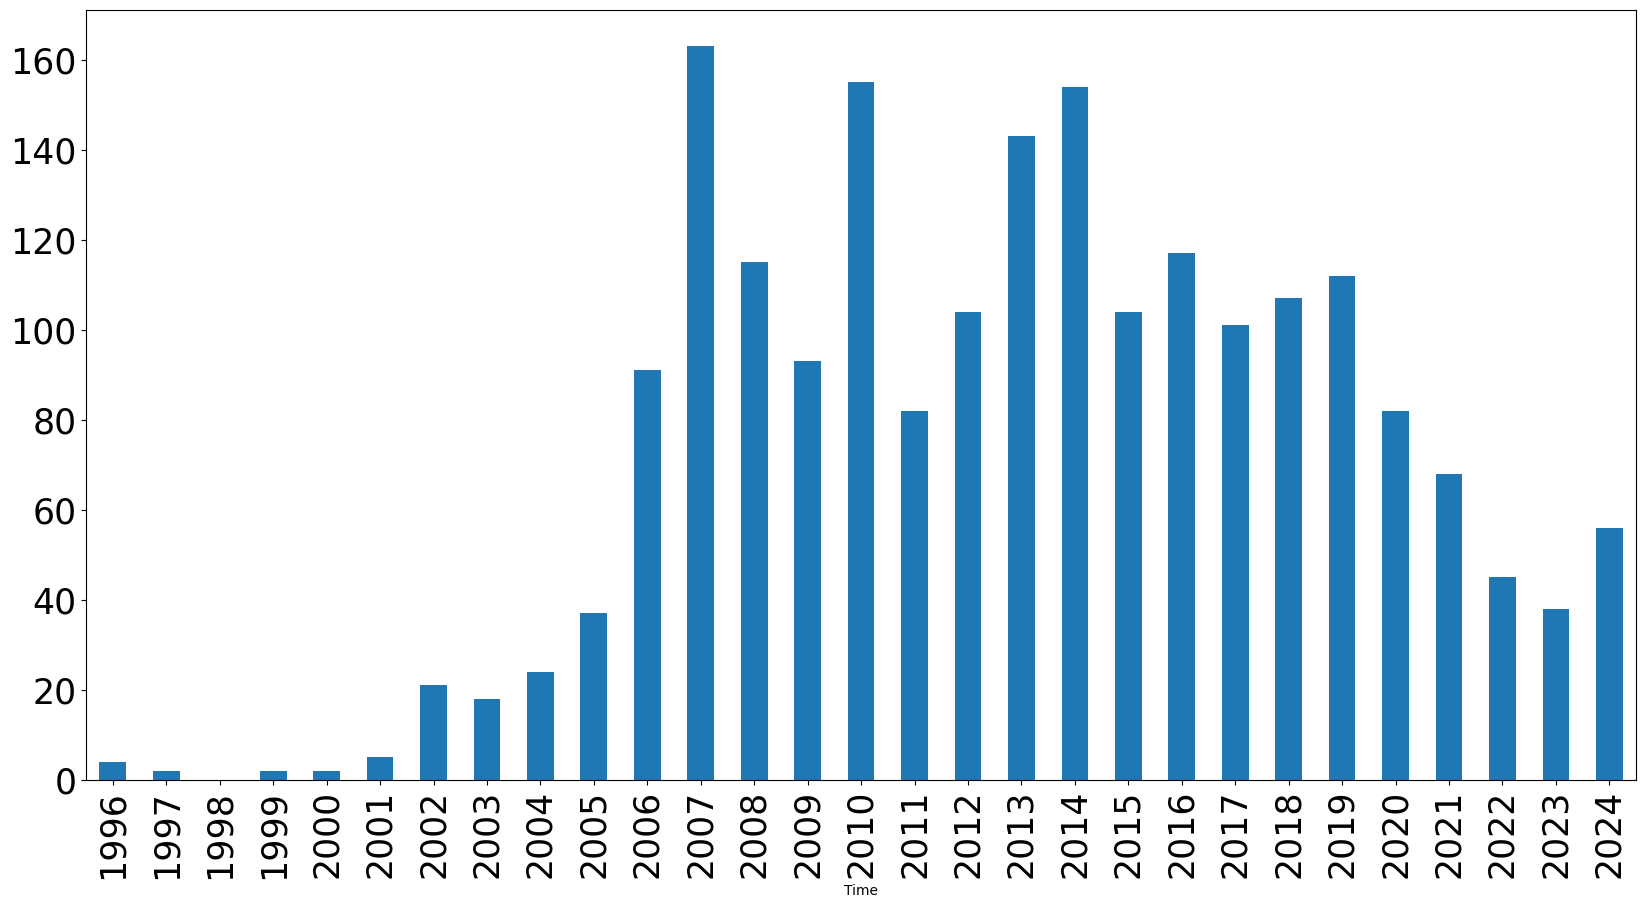

In [9]:
df.set_index("Time").resample("YE")["texts"].count().plot.bar(figsize=(20,10))
plt.xticks(range(0,29),range(1996,2025),size=25)
plt.yticks(size=25)
plt.show()

#### Immigration as a topic started spiking in 2006. It had been a hot topic ever since. It has peaked multiple times with the largest peak around 2010. Lately, the popularity of immigration as a topic has came down but had its peak in the latest election year. However, it didn't have any news related to immigrantions in 1998.

In [10]:
for col in df.columns:
    print(f"{col}")
    print(df[col].isna().sum())

Time
0
Label
0
texts
31


#### Drop the null rows. 31 rows in total.

In [11]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2045 entries, 0 to 2075
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Time    2045 non-null   datetime64[ns, UTC]
 1   Label   2045 non-null   object             
 2   texts   2045 non-null   object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 63.9+ KB


#### Sentiment Analysis with KClusters.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df.texts)
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
tfidf_matrix.shape

(2045, 7088)

#### Apply PCA

In [14]:
# from sklearn.decomposition import PCA
# pca=PCA().fit(tfidf_matrix)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');

#### The first top 800 components have covered 80% of the variances. However, I will only use the top 3 components for 3D visualization purposes.

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_pca=pca.fit_transform(tfidf_matrix)
print("Top 3 components for clustering:", X_pca)

Top 3 components for clustering: [[-0.05234774  0.12372267  0.06044943]
 [ 0.03141654  0.35365909 -0.09044821]
 [-0.07361298 -0.01201159 -0.03537186]
 ...
 [-0.062532   -0.11789472 -0.06573668]
 [-0.06688425 -0.0626148   0.02140002]
 [-0.05196544 -0.04368576  0.00617165]]


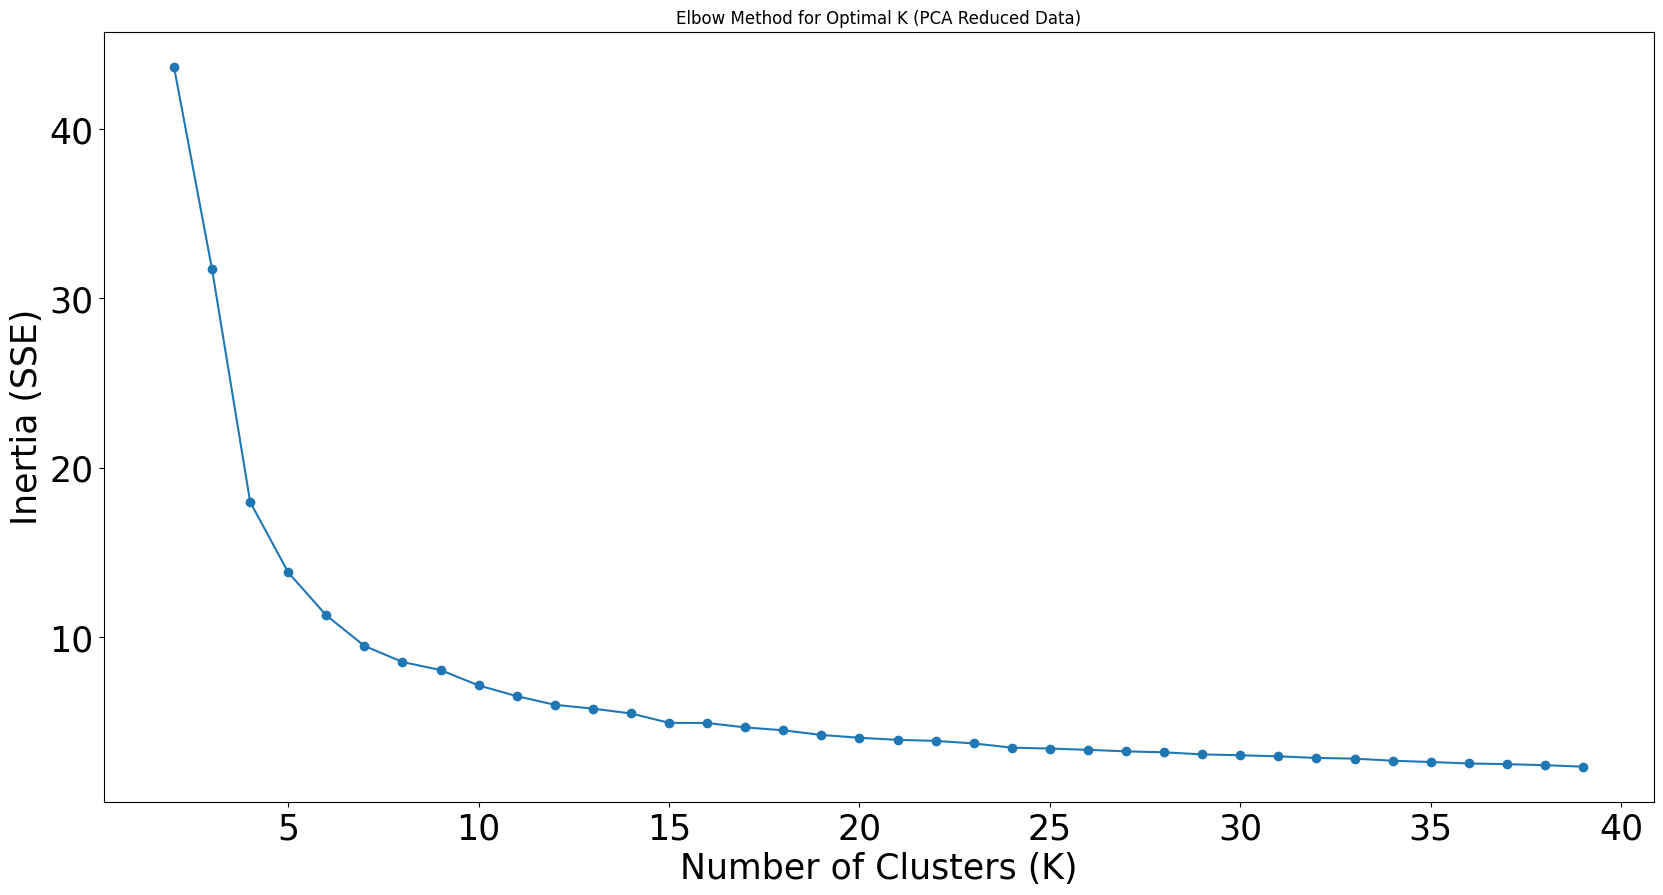

In [16]:
from sklearn.cluster import KMeans
sse = []  
for k in range(2, 40): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca,)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(20,10))
plt.plot(range(2,40), sse, marker='o')
plt.xlabel('Number of Clusters (K)',size=25)
plt.ylabel('Inertia (SSE)',size=25)
plt.title('Elbow Method for Optimal K (PCA Reduced Data)')
plt.xticks(size=25)
plt.yticks(size=25)
plt.show()

#### The Best clusters are 12.

#### Fit Model

In [17]:
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(X_pca)

labels = kmeans.labels_

In [18]:
df["Clusters"]=labels

In [19]:
df["Clusters"]=df.Clusters.astype("str")
df

,Time,Label,texts,Clusters
0,2024-10-21 00:00:00+00:00,short reads,Most U.S. voters say immigrants – no matter th...,5
1,2024-09-27 00:00:00+00:00,short reads,What the data says about immigrants in the U.S...,4
2,2024-09-27 00:00:00+00:00,report,Trump and Harris Supporters Differ on Mass Dep...,0
3,2024-10-09 00:00:00+00:00,report,Why Asian Immigrants Come to the U.S. and How ...,0
4,2024-07-22 00:00:00+00:00,short reads,What we know about unauthorized immigrants liv...,4
...,...,...,...,...
2071,1997-04-11 00:00:00+00:00,report,Americans Unmoved by Washington’s Big Stories....,7
2072,1996-08-07 00:00:00+00:00,report,Republicans. Analysis Breakdowns An analysis o...,0
2073,1996-06-25 00:00:00+00:00,report,"The Diminishing Divide…American Churches, Amer...",7
2074,1996-04-05 00:00:00+00:00,report,Democratic Congressional Prospects Improve. In...,7


In [20]:
cc=df.Clusters.sort_values(ascending=True).value_counts()
cc=cc.reset_index()
cc["Clusters"]=cc.Clusters.astype("str")
cc

,Clusters,count
0,7,565
1,0,535
2,5,216
3,10,195
4,11,151
5,1,103
6,9,92
7,2,55
8,4,52
9,6,31


In [22]:
fig=px.bar(data_frame=cc,x="Clusters",y="count",text_auto=True,width=700,height=500)
fig.update_traces(textposition="outside")
fig.show()

In [23]:
df_pca=pd.DataFrame(X_pca)
df_pca["Clusters"]=labels
df_pca["Clusters"]=df_pca.Clusters.astype("str")

#### Label each Clusters

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2045 entries, 0 to 2075
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Time      2045 non-null   datetime64[ns, UTC]
 1   Label     2045 non-null   object             
 2   texts     2045 non-null   object             
 3   Clusters  2045 non-null   object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 79.9+ KB


#### Attach clusters number to the datasets

In [25]:
df.Clusters.value_counts()

Clusters
7     565
0     535
5     216
10    195
11    151
1     103
9      92
2      55
4      52
6      31
3      30
8      20
Name: count, dtype: int64

In [26]:
df

,Time,Label,texts,Clusters
0,2024-10-21 00:00:00+00:00,short reads,Most U.S. voters say immigrants – no matter th...,5
1,2024-09-27 00:00:00+00:00,short reads,What the data says about immigrants in the U.S...,4
2,2024-09-27 00:00:00+00:00,report,Trump and Harris Supporters Differ on Mass Dep...,0
3,2024-10-09 00:00:00+00:00,report,Why Asian Immigrants Come to the U.S. and How ...,0
4,2024-07-22 00:00:00+00:00,short reads,What we know about unauthorized immigrants liv...,4
...,...,...,...,...
2071,1997-04-11 00:00:00+00:00,report,Americans Unmoved by Washington’s Big Stories....,7
2072,1996-08-07 00:00:00+00:00,report,Republicans. Analysis Breakdowns An analysis o...,0
2073,1996-06-25 00:00:00+00:00,report,"The Diminishing Divide…American Churches, Amer...",7
2074,1996-04-05 00:00:00+00:00,report,Democratic Congressional Prospects Improve. In...,7


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2045 entries, 0 to 2075
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Time      2045 non-null   datetime64[ns, UTC]
 1   Label     2045 non-null   object             
 2   texts     2045 non-null   object             
 3   Clusters  2045 non-null   object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 79.9+ KB


#### Extract key words from each clusters

In [28]:
df_0=df.query("Clusters=='0'")["texts"]
df_1=df.query("Clusters=='1'")["texts"]
df_2=df.query("Clusters=='2'")["texts"]
df_3=df.query("Clusters=='3'")["texts"]
df_4=df.query("Clusters=='4'")["texts"]
df_5=df.query("Clusters=='5'")["texts"]
df_6=df.query("Clusters=='6'")["texts"]
df_7=df.query("Clusters=='7'")["texts"]
df_8=df.query("Clusters=='8'")["texts"]
df_9=df.query("Clusters=='9'")["texts"]
df_10=df.query("Clusters=='10'")["texts"]
df_11=df.query("Clusters=='11'")["texts"]

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
lst=[]
for df in [df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11]:
    cv = CountVectorizer(stop_words="english")
    cv.fit_transform(df)
    l_vocab=cv.vocabulary_
    lst.append(l_vocab)

#### Inspect Clusters for insights

##### Turn CountVectorizer vocabularies to a list of lists of vocabularies.

In [30]:
lst_vocab=[]
for i in range(0,12):
    lst_vocab.append(list(lst[i].keys()))

#### Show the first 100 key words for each cluster

In [31]:
for i in range(len(lst_vocab)):
    print(f"Cluster {i}")
    print(lst_vocab[i][:50])
    print("====================")

Cluster 0
['trump', 'harris', 'supporters', 'differ', 'mass', 'deportations', 'favor', 'border', 'security', 'high', 'skilled', 'immigration', 'majority', 'backers', 'say', 'immigrants', 'make', 'life', 'worse', 'people', 'like', 'wouldn', 'change', 'asian', 'come', 'view', 'cite', 'good', 'comparative', 'standard', 'living', '59', 'major', 'issues', 'hardships', 'dreams', 'americans', 'poverty', 'live', 'pew', 'research', 'center', 'conducted', '18', 'focus', 'groups', '12', 'languages', 'explore', 'stories']
Cluster 1
['immigrant', 'population', '2023', 'saw', 'largest', 'increase', '20', 'years', 'number', 'immigrants', 'living', 'grew', 'million', 'people', 'annual', '2000', 'origins', 'america', 'changed', '1850', '2022', 'reached', 'high', '46', 'accounting', '13', 'facts', 'recent', 'latino', '2021', 'foreign', 'born', 'hispanics', 'children', 'make', '15', '118th', 'congress', '81', 'voting', 'members', 'parent', 'country', 'key', 'nation', '47', 'black', 'americans', 'united',

In [32]:
# For cluster 0, There are lots of key words regarding to 2024 election and its focus on immigration policies from both candidates.
# Cluster 1 has key words regarding to the undocumented immigrants living in the US.
# Cluster 2 focuses on key words on how immigrants from different ethnic backgrounds had voted during elections in the past, 
# and how it impact the election outcomes in the red, bklue and swing states..
# Cluster 3 has key words about the origins of hispanics Americans from south America such as Venezuelan, Hondura, and Ecuador, and how their presence has changed 
# through the years.

map_dict={"0":"Trump 2024 Immigration Policy",
          "1":"The Increase of Immigration Population",
          "2":"Anatomy of Hispanics in US",
          "3":"Hispanics Voting Record in the past",
          "4":"Population Changes of Mexcian Immigrants",
          "5":"Public Opinoins on Undocumented Immigrants",
          "6":"How Increase of Immigrants had affected election outcomes",
          "7":"2024 Elections Candidates' Stands on Boarder Security",
          "8":"Top Origins for Hispanics",
          "9":"The Fiancial Well Being of Immigrants in US",
         "10":"Challenges faced by new Immigrants",
         "11":"Economic Growth as Immigrants' Top Priority",
         }

In [33]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         2045 non-null   float64
 1   1         2045 non-null   float64
 2   2         2045 non-null   float64
 3   Clusters  2045 non-null   object 
dtypes: float64(3), object(1)
memory usage: 64.0+ KB


In [34]:
df_pca

,0,1,2,Clusters
0,-0.052348,0.123723,0.060449,5
1,0.031417,0.353659,-0.090448,4
2,-0.073613,-0.012012,-0.035372,0
3,-0.056301,0.033901,-0.052545,0
4,0.078060,0.452788,-0.074842,4
...,...,...,...,...
2040,-0.056807,-0.111678,-0.060006,7
2041,-0.031948,-0.021825,-0.030104,0
2042,-0.062532,-0.117895,-0.065737,7
2043,-0.066884,-0.062615,0.021400,7


In [35]:
df_pca["Clusters_label"]=df_pca.Clusters.map(map_dict)


In [36]:
df_pca.rename(columns={0:"Dimension_0",1:"Dimension_1",2:"Dimension_2"},inplace=True)

In [37]:
df_pca

,Dimension_0,Dimension_1,Dimension_2,Clusters,Clusters_label
0,-0.052348,0.123723,0.060449,5,Public Opinoins on Undocumented Immigrants
1,0.031417,0.353659,-0.090448,4,Population Changes of Mexcian Immigrants
2,-0.073613,-0.012012,-0.035372,0,Trump 2024 Immigration Policy
3,-0.056301,0.033901,-0.052545,0,Trump 2024 Immigration Policy
4,0.078060,0.452788,-0.074842,4,Population Changes of Mexcian Immigrants
...,...,...,...,...,...
2040,-0.056807,-0.111678,-0.060006,7,2024 Elections Candidates' Stands on Boarder S...
2041,-0.031948,-0.021825,-0.030104,0,Trump 2024 Immigration Policy
2042,-0.062532,-0.117895,-0.065737,7,2024 Elections Candidates' Stands on Boarder S...
2043,-0.066884,-0.062615,0.021400,7,2024 Elections Candidates' Stands on Boarder S...


In [38]:
count_pca=df_pca.groupby(["Clusters_label"]).Clusters.count().sort_values(ascending=False)
count_plot=count_pca.reset_index()
count_plot=count_plot.rename(columns={"Clusters":"Clusters_Count"})
count_plot

,Clusters_label,Clusters_Count
0,2024 Elections Candidates' Stands on Boarder S...,565
1,Trump 2024 Immigration Policy,535
2,Public Opinoins on Undocumented Immigrants,216
3,Challenges faced by new Immigrants,195
4,Economic Growth as Immigrants' Top Priority,151
5,The Increase of Immigration Population,103
6,The Fiancial Well Being of Immigrants in US,92
7,Anatomy of Hispanics in US,55
8,Population Changes of Mexcian Immigrants,52
9,How Increase of Immigrants had affected electi...,31


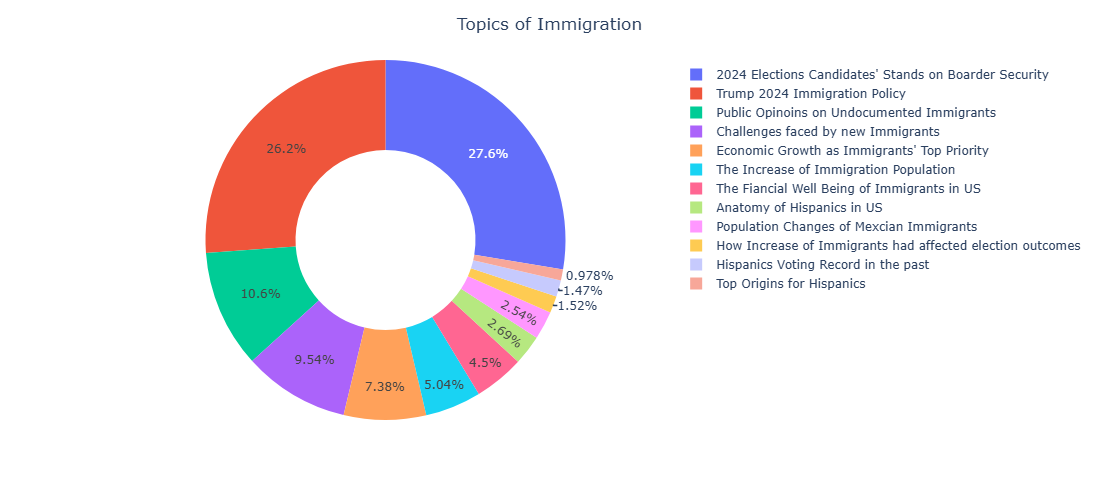

In [54]:
fig=px.pie(data_frame=count_plot,values="Clusters_Count",names="Clusters_label",hole=0.5)
fig.update_layout(width=1000,height=500,title=dict(x=0.5,text="Topics of Immigration"))
fig.show()

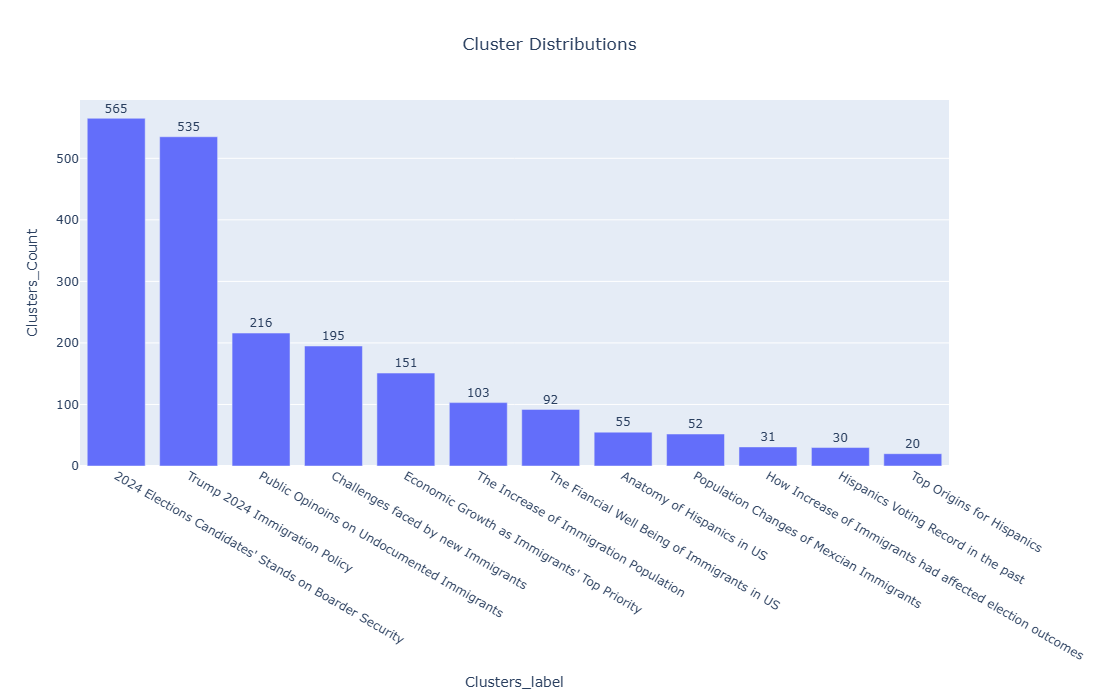

In [40]:
fig=px.bar(data_frame=count_plot,x="Clusters_label",y="Clusters_Count",text_auto=True,width=800,height=700,title="Cluster Distributions")
fig.update_layout(title=dict(x=0.5))
fig.update_traces(textposition="outside")
fig.show()

#### Plot it on the 3D graph

In [41]:
centers=kmeans.cluster_centers_

In [42]:
c0=centers[0]
c1=centers[1]
c2=centers[2]
c3=centers[3]
c4=centers[4]
c5=centers[5]
c6=centers[6]
c7=centers[7]
c8=centers[8]
c9=centers[9]
c10=centers[10]
c11=centers[11]

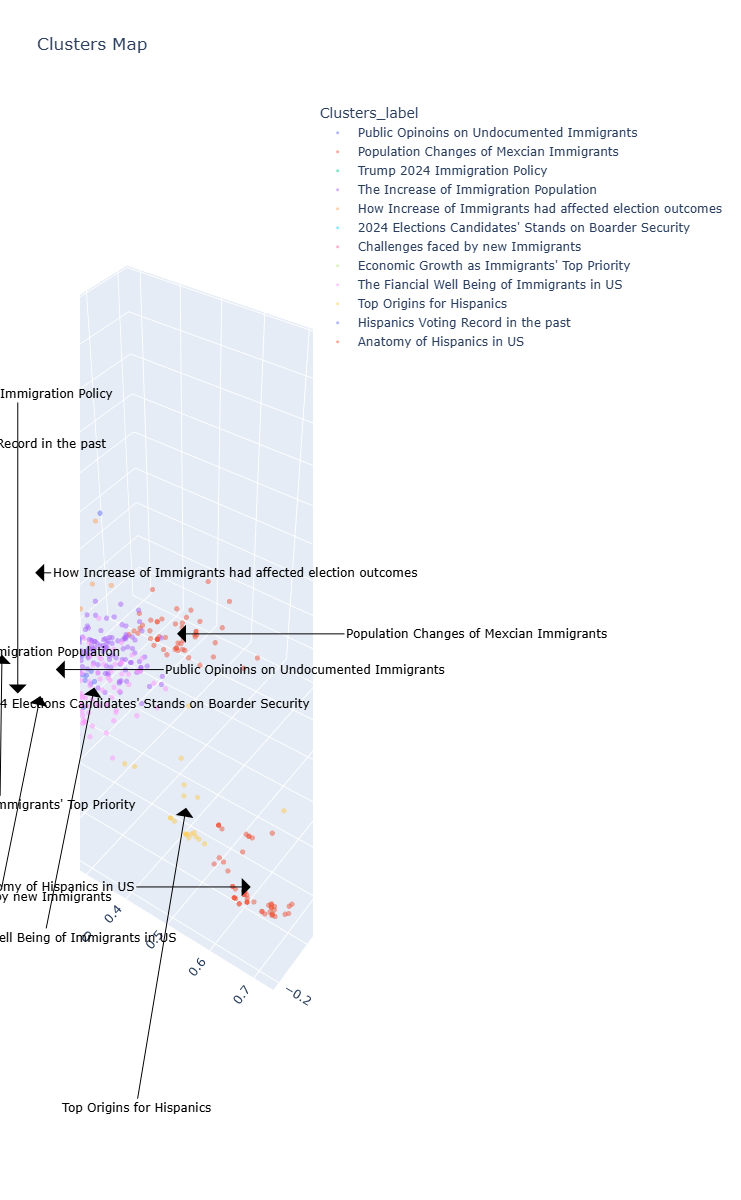

In [43]:
fig=px.scatter_3d(df_pca,x="Dimension_0",y="Dimension_1",z="Dimension_2",
                  color="Clusters_label",opacity=0.5,width=1200,height=1200,
                  title="Clusters Map")

fig.update_traces(marker_size=3,textposition="top center",)
fig.update_layout(
    scene=dict(
        xaxis=dict(type="linear"),
        yaxis=dict(type="linear"),
        zaxis=dict(type="linear"),
    annotations=[
        dict(
            x=c0[0],
            y=c0[1],
            z=c0[2],
            text=map_dict["0"],
            textangle=0,
            ax=0,
            ay=-300,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        dict(
            x=c1[0],
            y=c1[1],
            z=c1[2],
            text=map_dict["1"],
            textangle=0,
            ax=-250,
            ay=0,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        dict(
            x=c2[0],
            y=c2[1],
            z=c2[2],
            text=map_dict["2"],
            textangle=0,
            ax=-200,
            ay=0,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        dict(
            x=c3[0],
            y=c3[1],
            z=c3[2],
            text=map_dict["3"],
            textangle=0,
            ax=-150,
            ay=0,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        dict(
            x=c4[0],
            y=c4[1],
            z=c4[2],
            text=map_dict["4"],
            textangle=0,
            ax=300,
            ay=0,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        dict(
            x=c5[0],
            y=c5[1],
            z=c5[2],
            text=map_dict["5"],
            textangle=0,
            ax=250,
            ay=0,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        dict(
            x=c6[0],
            y=c6[1],
            z=c6[2],
            text=map_dict["6"],
            textangle=0,
            ax=200,
            ay=0,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        dict(
            x=c7[0],
            y=c7[1],
            z=c7[2],
            text=map_dict["7"],
            textangle=0,
            ax=150,
            ay=0,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        dict(
            x=c8[0],
            y=c8[1],
            z=c8[2],
            text=map_dict["8"],
            textangle=0,
            ax=-50,
            ay=300,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        dict(
            x=c9[0],
            y=c9[1],
            z=c9[2],
            text=map_dict["9"],
            textangle=0,
            ax=-50,
            ay=250,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        dict(
            x=c10[0],
            y=c10[1],
            z=c10[2],
            text=map_dict["10"],
            textangle=0,
            ax=-50,
            ay=200,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        dict(
            x=c11[0],
            y=c11[1],
            z=c11[2],
            text=map_dict["11"],
            textangle=0,
            ax=-50,
            ay=150,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),
        
    ]
))
fig.show()

#### The trend of each cluster through the years in line charts

In [44]:
df_pca

,Dimension_0,Dimension_1,Dimension_2,Clusters,Clusters_label
0,-0.052348,0.123723,0.060449,5,Public Opinoins on Undocumented Immigrants
1,0.031417,0.353659,-0.090448,4,Population Changes of Mexcian Immigrants
2,-0.073613,-0.012012,-0.035372,0,Trump 2024 Immigration Policy
3,-0.056301,0.033901,-0.052545,0,Trump 2024 Immigration Policy
4,0.078060,0.452788,-0.074842,4,Population Changes of Mexcian Immigrants
...,...,...,...,...,...
2040,-0.056807,-0.111678,-0.060006,7,2024 Elections Candidates' Stands on Boarder S...
2041,-0.031948,-0.021825,-0.030104,0,Trump 2024 Immigration Policy
2042,-0.062532,-0.117895,-0.065737,7,2024 Elections Candidates' Stands on Boarder S...
2043,-0.066884,-0.062615,0.021400,7,2024 Elections Candidates' Stands on Boarder S...


In [45]:
df=pd.read_csv("pew_research.csv",parse_dates=["Time"])
df=df.drop(df.columns[0],axis=1)
df=df.dropna()
df=df.reset_index(drop=True)
df.shape

(2045, 4)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Header       2045 non-null   object             
 1   Description  2045 non-null   object             
 2   Time         2045 non-null   datetime64[ns, UTC]
 3   Label        2045 non-null   object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 64.0+ KB


In [47]:
df

,Header,Description,Time,Label
0,Most U.S. voters say immigrants – no matter th...,Three-quarters of voters say undocumented immi...,2024-10-21 00:00:00+00:00,short reads
1,What the data says about immigrants in the U.S.,"In 2022, roughly 10.6 million immigrants livin...",2024-09-27 00:00:00+00:00,short reads
2,Trump and Harris Supporters Differ on Mass Dep...,A majority of Trump backers say more immigrant...,2024-09-27 00:00:00+00:00,report
3,Why Asian Immigrants Come to the U.S. and How ...,Most say they’d move to the U.S. again if they...,2024-10-09 00:00:00+00:00,report
4,What we know about unauthorized immigrants liv...,The unauthorized immigrant population in the U...,2024-07-22 00:00:00+00:00,short reads
...,...,...,...,...
2040,Americans Unmoved by Washington’s Big Stories,Introduction and Summary Top news stories from...,1997-04-11 00:00:00+00:00,report
2041,Republicans,Analysis Breakdowns An analysis of recent Pew ...,1996-08-07 00:00:00+00:00,report
2042,"The Diminishing Divide…American Churches, Amer...",Introduction and Summary Religion is a strong ...,1996-06-25 00:00:00+00:00,report
2043,Democratic Congressional Prospects Improve,Introduction and Summary Criticism of the GOP ...,1996-04-05 00:00:00+00:00,report


In [48]:
df_cluster_label=pd.concat([df["Time"],df_pca[["Clusters_label","Clusters"]]],axis=1)


In [49]:
df_cluster_label["Year"]=df_cluster_label["Time"].dt.year
df_cluster_label

,Time,Clusters_label,Clusters,Year
0,2024-10-21 00:00:00+00:00,Public Opinoins on Undocumented Immigrants,5,2024
1,2024-09-27 00:00:00+00:00,Population Changes of Mexcian Immigrants,4,2024
2,2024-09-27 00:00:00+00:00,Trump 2024 Immigration Policy,0,2024
3,2024-10-09 00:00:00+00:00,Trump 2024 Immigration Policy,0,2024
4,2024-07-22 00:00:00+00:00,Population Changes of Mexcian Immigrants,4,2024
...,...,...,...,...
2040,1997-04-11 00:00:00+00:00,2024 Elections Candidates' Stands on Boarder S...,7,1997
2041,1996-08-07 00:00:00+00:00,Trump 2024 Immigration Policy,0,1996
2042,1996-06-25 00:00:00+00:00,2024 Elections Candidates' Stands on Boarder S...,7,1996
2043,1996-04-05 00:00:00+00:00,2024 Elections Candidates' Stands on Boarder S...,7,1996


In [50]:
#line_plot=df_cluster_label.groupby("Year")
plt.figure(figsize=(20,10))
c0=df_cluster_label.query("Clusters=='0'").groupby("Year")["Clusters"].count()
c0=c0.reset_index()
c1=df_cluster_label.query("Clusters=='1'").groupby("Year")["Clusters"].count()
c1=c1.reset_index()
c2=df_cluster_label.query("Clusters=='2'").groupby("Year")["Clusters"].count()
c2=c2.reset_index()
c3=df_cluster_label.query("Clusters=='3'").groupby("Year")["Clusters"].count()
c3=c3.reset_index()
c4=df_cluster_label.query("Clusters=='4'").groupby("Year")["Clusters"].count()
c4=c4.reset_index()
c5=df_cluster_label.query("Clusters=='5'").groupby("Year")["Clusters"].count()
c5=c5.reset_index()
c6=df_cluster_label.query("Clusters=='6'").groupby("Year")["Clusters"].count()
c6=c6.reset_index()
c7=df_cluster_label.query("Clusters=='7'").groupby("Year")["Clusters"].count()
c7=c7.reset_index()
c8=df_cluster_label.query("Clusters=='8'").groupby("Year")["Clusters"].count()
c8=c8.reset_index()
c9=df_cluster_label.query("Clusters=='9'").groupby("Year")["Clusters"].count()
c9=c9.reset_index()
c10=df_cluster_label.query("Clusters=='10'").groupby("Year")["Clusters"].count()
c10=c10.reset_index()
c11=df_cluster_label.query("Clusters=='11'").groupby("Year")["Clusters"].count()
c11=c11.reset_index()

#sns.lineplot(data=df_cluster_label,x="Year",y=df_cluster_label["Clusters"],hue="Clusters_label")

<Figure size 2000x1000 with 0 Axes>

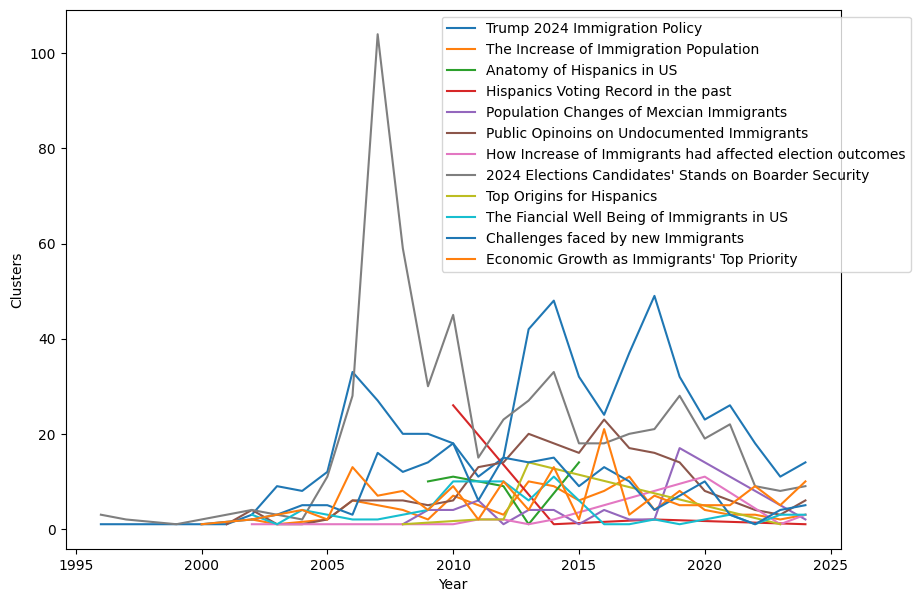

In [51]:
plt.figure(figsize=(10,7))
sns.lineplot(x=c0.Year,y=c0.Clusters,label=map_dict["0"])
sns.lineplot(x=c1.Year,y=c1.Clusters,label=map_dict["1"])
sns.lineplot(x=c2.Year,y=c2.Clusters,label=map_dict["2"])
sns.lineplot(x=c3.Year,y=c3.Clusters,label=map_dict["3"])
# plt.legend(bbox_to_anchor=(1.1,1))
# plt.show()

# plt.figure(figsize=(10,7))
sns.lineplot(x=c4.Year,y=c4.Clusters,label=map_dict["4"])
sns.lineplot(x=c5.Year,y=c5.Clusters,label=map_dict["5"])
sns.lineplot(x=c6.Year,y=c6.Clusters,label=map_dict["6"])
sns.lineplot(x=c7.Year,y=c7.Clusters,label=map_dict["7"])
# plt.legend(bbox_to_anchor=(1.7,1))
# plt.show()

# plt.figure(figsize=(10,7))
sns.lineplot(x=c8.Year,y=c8.Clusters,label=map_dict["8"])
sns.lineplot(x=c9.Year,y=c9.Clusters,label=map_dict["9"])
sns.lineplot(x=c10.Year,y=c10.Clusters,label=map_dict["10"])
sns.lineplot(x=c11.Year,y=c11.Clusters,label=map_dict["11"])
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

#### Conclusion
<ol>
    <li>Hot topics of Immigrations such as border securities, undocumented immigants, deportations have been hot topics since 1990s. They amplified after 2015.</li>
    <li>Economic Growth have been hot topics among immigrants for a very long time, and it just keeps getting hotter.</li>
    <li>Policitians need to address the core issues such as boarder security, economic growth, challenges faced by immigrants, undocumented immigrannts in order to win the votes from immigrants especially from hispanic voters.</li>
</ol>

#### The End for part 2
#### Continue in Part 3